# Project - Loan repayment prediction using Decision Tree Classifier

Following steps are followed in this project

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Predictions and Evaluations
8. Handle Class Imbalance
9. Hyperparameter Tuning

## 1. Importing libraries

In [1]:
# Data load and manipulation
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## 2. Load Data

In [2]:
df = pd.read_csv("3_Data_LoanRepayment_DecisionTrees_RandomForest.csv")

## 3. Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


1. By looking at summary, we see that there are no null values in the dataset.
2. There are 14 columns and 9578 rows in dataset

In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


By using describe method, we can see the summary statistics of dataset

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
num_col = df.select_dtypes(include = np.number).columns
print('Numerical columns are : \n', num_col)

cat_col = df.select_dtypes(exclude = np.number).columns
print('Categorical columns are : \n', cat_col)


Numerical columns are : 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns are : 
 Index(['purpose'], dtype='object')


There are no NA values and no extra spaces in column names. So that, we can say data is clean

## 4. Data Pre-processing

In [7]:
# Lets do One Hot encoding for the column 'Purpose', as model would be expecting numerical features

df = pd.get_dummies(prefix = 'purpose', data = df, columns = ['purpose'])

In [8]:
num_col = df.select_dtypes(include = np.number).columns
print('Numerical columns are : \n', num_col)

cat_col = df.select_dtypes(exclude = np.number).columns
print('Categorical columns are : \n', cat_col)

Numerical columns are : 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')
Categorical columns are : 
 Index([], dtype='object')


We can see that, there are no more categorical columns.

We are done with pre-processing of data

## 5. Exploratory Data Analysis

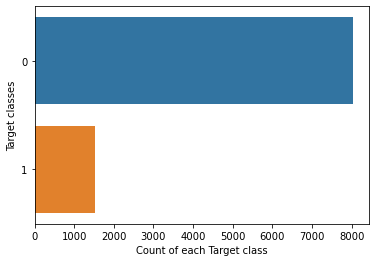

In [9]:
# Check the distribution of y variable

sns.countplot(y=df['not.fully.paid'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

This is highly imbalaned data, as count of 0 is around 8000 and 1 around 1500 only

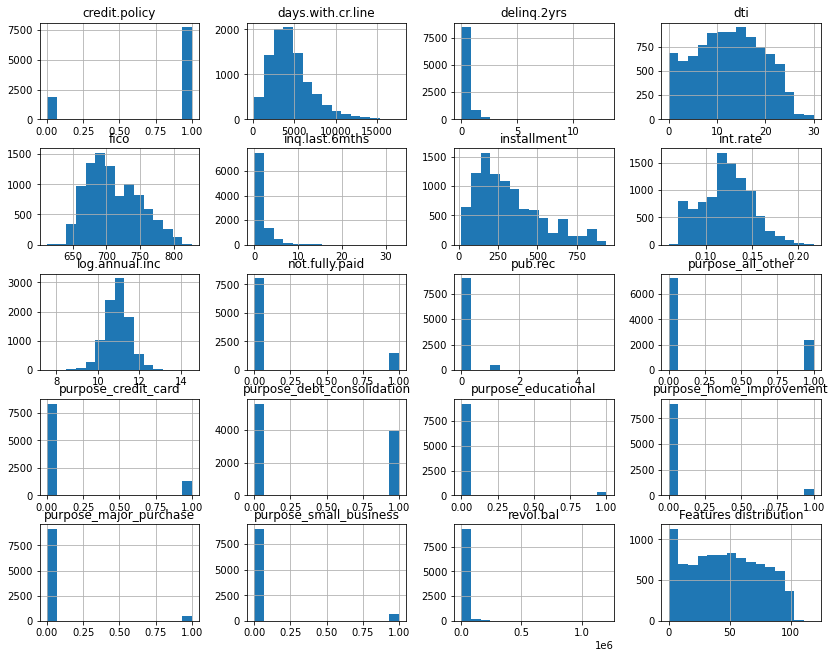

In [10]:
#  check distribution of other features in dataset
df.hist(figsize = (14,11), bins = 15)
plt.title('Features distribution')
plt.show()

<AxesSubplot:>

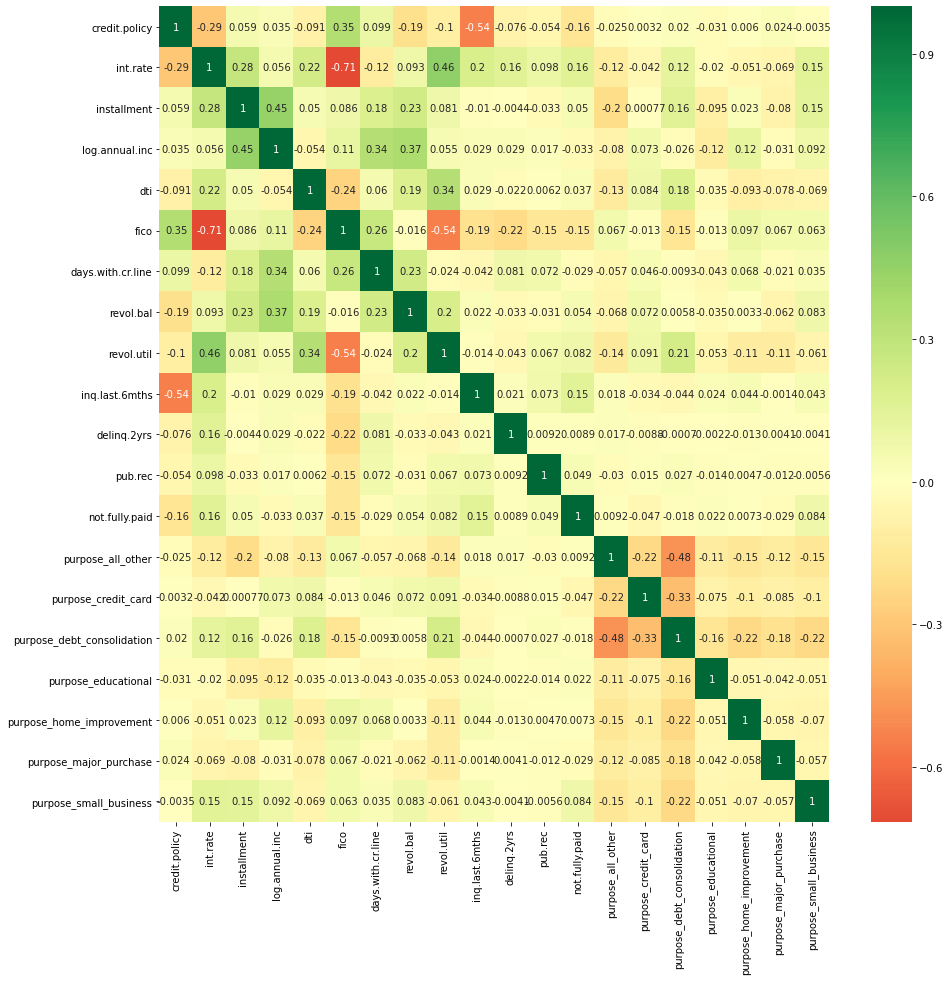

In [11]:
# Lets check the multi-colinearity of the features by correlation matric

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', center = 0)

## 6. Model Building

In [12]:
# train-test split
x = df.drop(['not.fully.paid'], axis = 1)
y = df['not.fully.paid']

# We will use 70% data for training the model and 30% for testing
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 500)

## 7. Prediction and Evaluation

### Decision tree with criterion = gini

In [13]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))


Confusion Matrix : 
  [[2018  374]
 [ 369  113]]

 Accuracy Score : 
  0.7414752957550452

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2392
           1       0.23      0.23      0.23       482

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.74      0.74      2874



Interpretation of model:
1. The accuracy score is 0.74 which may seem good
2. Score for class 0 is good and worst for the class 1, this may happen because of high class imbalance


### Decision tree with criterion = entropy

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2034  358]
 [ 396   86]]

 Accuracy Score : 
  0.7376478775226165

 Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2392
           1       0.19      0.18      0.19       482

    accuracy                           0.74      2874
   macro avg       0.52      0.51      0.51      2874
weighted avg       0.73      0.74      0.73      2874



1. The accuracy score has not changed much
2. Using entropy as criterion does not solve the problem of class imbalance.

### 8. Handle class imbalance

In [15]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Handle class imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(x, y)

print(y_ros.value_counts())

x_train,x_test,y_train,y_test = train_test_split(X_ros,y_ros, test_size = 0.3, random_state = 0)

1    8045
0    8045
Name: not.fully.paid, dtype: int64


### Decision tree with criterion = gini

In [22]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[1935  475]
 [  27 2390]]

 Accuracy Score : 
  0.8960016573441061

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      2410
           1       0.83      0.99      0.90      2417

    accuracy                           0.90      4827
   macro avg       0.91      0.90      0.90      4827
weighted avg       0.91      0.90      0.90      4827



After balancing the data, we can see that, results are far more better than before
1. Precision score is increased to 0.89, which means our model is predicting 89% of the results right
2. precision,recall and f1-score are same for the both the class
3. By just balancing the data, we found out that, model is performing well enough


### Decision tree with criterion = entropy

In [23]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[1917  493]
 [  28 2389]]

 Accuracy Score : 
  0.8920654650921898

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      2410
           1       0.83      0.99      0.90      2417

    accuracy                           0.89      4827
   macro avg       0.91      0.89      0.89      4827
weighted avg       0.91      0.89      0.89      4827



criterion = entropy is also giving better results than before

Now, we continue refining model using Hyper parameter tuning

## 9. Hyperparameter Tuning
### Grid search CV

We will be using grid search. We will be playing around 2 parameters,
1. Criterion : Measure of impurity
2. max_depth : max depth a tree can grow




In [30]:
d_tree = DecisionTreeClassifier()
# defining parameter range 
params = { 'criterion':['entropy','gini'],
         'max_depth' : [10,15,20,25,30,40,50]}
grid = GridSearchCV(d_tree, params, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] criterion=entropy, max_depth=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... criterion=entropy, max_depth=10, score=0.669, total=   0.2s
[CV] criterion=entropy, max_depth=10 .................................
[CV] ..... criterion=entropy, max_depth=10, score=0.668, total=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] criterion=entropy, max_depth=10 .................................
[CV] ..... criterion=entropy, max_depth=10, score=0.669, total=   0.2s
[CV] criterion=entropy, max_depth=10 .................................
[CV] ..... criterion=entropy, max_depth=10, score=0.683, total=   0.2s
[CV] criterion=entropy, max_depth=10 .................................
[CV] ..... criterion=entropy, max_depth=10, score=0.693, total=   0.2s
[CV] criterion=entropy, max_depth=15 .................................
[CV] ..... criterion=entropy, max_depth=15, score=0.744, total=   0.3s
[CV] criterion=entropy, max_depth=15 .................................
[CV] ..... criterion=entropy, max_depth=15, score=0.736, total=   0.3s
[CV] criterion=entropy, max_depth=15 .................................
[CV] ..... criterion=entropy, max_depth=15, score=0.784, total=   0.3s
[CV] criterion=entropy, max_depth=15 .................................
[CV] ..... criterion=entropy, max_depth=15, score=0.760, total=   0.3s
[CV] c

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   17.1s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25, 30, 40, 50]},
             verbose=3)

Grid Search CV made 14 different model combinations using given grid parameters and will suggest the best model

Total models built by grid search are 14*5 = 70

In [34]:
# Getting the best parameters after hyper parameter tuning
print(grid.best_params_)

# Model parameters
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 50}
DecisionTreeClassifier(criterion='entropy', max_depth=50)


In [35]:
# Prediction using best parameters
grid_predictions = grid.predict(x_test) 
  
# print classification report 
print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

Confusion Matrix : 
  [[1892  518]
 [  42 2375]]

 Accuracy Score : 
  0.8839859125750984

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      2410
           1       0.82      0.98      0.89      2417

    accuracy                           0.88      4827
   macro avg       0.90      0.88      0.88      4827
weighted avg       0.90      0.88      0.88      4827



By hyperparameter tuning, we got good accuracy score. Also, classification report is good for both classes

This is the end of the notebook

## Thank you...!
